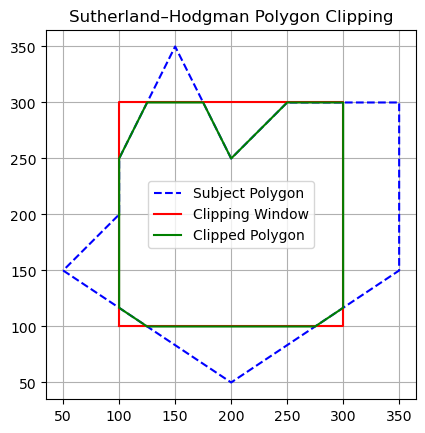

In [4]:
import matplotlib.pyplot as plt

def inside(p, edge_start, edge_end):
    """Check if point p is inside the edge defined by edge_start -> edge_end"""
    x, y = p
    x1, y1 = edge_start
    x2, y2 = edge_end
    return (x2 - x1)*(y - y1) - (y2 - y1)*(x - x1) >= 0

def compute_intersection(p1, p2, edge_start, edge_end):
    """Compute intersection point of line p1->p2 with edge edge_start->edge_end"""
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = edge_start
    x4, y4 = edge_end

    denom = (x1 - x2)*(y3 - y4) - (y1 - y2)*(x3 - x4)
    if denom == 0:
        return None  # Lines are parallel, no intersection

    px = ((x1*y2 - y1*x2)*(x3 - x4) - (x1 - x2)*(x3*y4 - y3*x4)) / denom
    py = ((x1*y2 - y1*x2)*(y3 - y4) - (y1 - y2)*(x3*y4 - y3*x4)) / denom
    return (px, py)

def sutherland_hodgman_clip(subject_polygon, clip_polygon):
    output_polygon = subject_polygon[:]
    for i in range(len(clip_polygon)):
        input_polygon = output_polygon[:]
        output_polygon = []
        if not input_polygon:
            break

        edge_start = clip_polygon[i]
        edge_end = clip_polygon[(i + 1) % len(clip_polygon)]

        prev_point = input_polygon[-1]
        for curr_point in input_polygon:
            if inside(curr_point, edge_start, edge_end):
                if not inside(prev_point, edge_start, edge_end):
                    inter_point = compute_intersection(prev_point, curr_point, edge_start, edge_end)
                    if inter_point:
                        output_polygon.append(inter_point)
                output_polygon.append(curr_point)
            elif inside(prev_point, edge_start, edge_end):
                inter_point = compute_intersection(prev_point, curr_point, edge_start, edge_end)
                if inter_point:
                    output_polygon.append(inter_point)
            prev_point = curr_point
    return output_polygon

Define subject polygon (to be clipped)
subject_polygon = [(50,150), (200,50), (350,150), (350,300), (250,300), (200,250), (150,350), (100,250), (100,200)]

 Define rectangular clipping window (clipping polygon)
clip_polygon = [(100,100), (300,100), (300,300), (100,300)]

 Perform clipping
clipped_polygon = sutherland_hodgman_clip(subject_polygon, clip_polygon)

 Plotting function
def plot_polygons(subject, clip, result):
    plt.figure()
    # Close the polygons for display
    sx, sy = zip(*(subject + [subject[0]]))
    cx, cy = zip(*(clip + [clip[0]]))
    plt.plot(sx, sy, 'b--', label="Subject Polygon")
    plt.plot(cx, cy, 'r-', label="Clipping Window")

    if result:
        rx, ry = zip(*(result + [result[0]]))
        plt.plot(rx, ry, 'g-', label="Clipped Polygon")

    plt.gca().set_aspect('equal')
    plt.title("Sutherland–Hodgman Polygon Clipping")
    plt.legend()
    plt.savefig("Sutherland-Hodgman Polygon Clipping Algorithm.jpg")
    plt.grid(True)
    plt.show()

# Visualize
plot_polygons(subject_polygon, clip_polygon, clipped_polygon)
